In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Création d'un dataset simple 

In [15]:
np.random.seed(41)

# 100 maisons
n = 100
data = pd.DataFrame({
    'surface': np.random.randint(50, 200, n),            # en m²
    'chambres': np.random.randint(1, 6, n),              # nombre de chambres
    'age': np.random.randint(0, 50, n),                  # âge de la maison
    'proximite_centre': np.random.randint(1, 20, n)      # km du centre-ville
})

# Prix simulé avec bruit
data['prix'] = (data['surface']*3000 + data['chambres']*10000 - data['age']*500 + np.random.randn(n)*10000)

data.head()


,surface,chambres,age,proximite_centre,prix
0,190,3,40,17,565337.579012
1,130,3,36,12,411462.492726
2,115,5,41,1,363447.980104
3,139,5,49,1,454623.848602
4,76,1,44,8,208819.796205


# Analyse exploratoire

In [4]:
print(data.describe())

          surface    chambres         age  proximite_centre           prix
count  100.000000  100.000000  100.000000        100.000000     100.000000
mean   119.950000    2.910000   25.650000          9.830000  376526.460118
std     42.128321    1.429099   13.802631          5.822379  127138.534846
min     51.000000    1.000000    0.000000          1.000000  147655.976435
25%     86.750000    1.750000   16.750000          5.000000  276268.456061
50%    117.000000    3.000000   26.500000         10.000000  367420.987528
75%    153.000000    4.000000   35.250000         15.000000  472105.729326
max    199.000000    5.000000   49.000000         19.000000  633578.385403


Ici on retrouve un résumé statistique pour chaque variable du jeu de données.

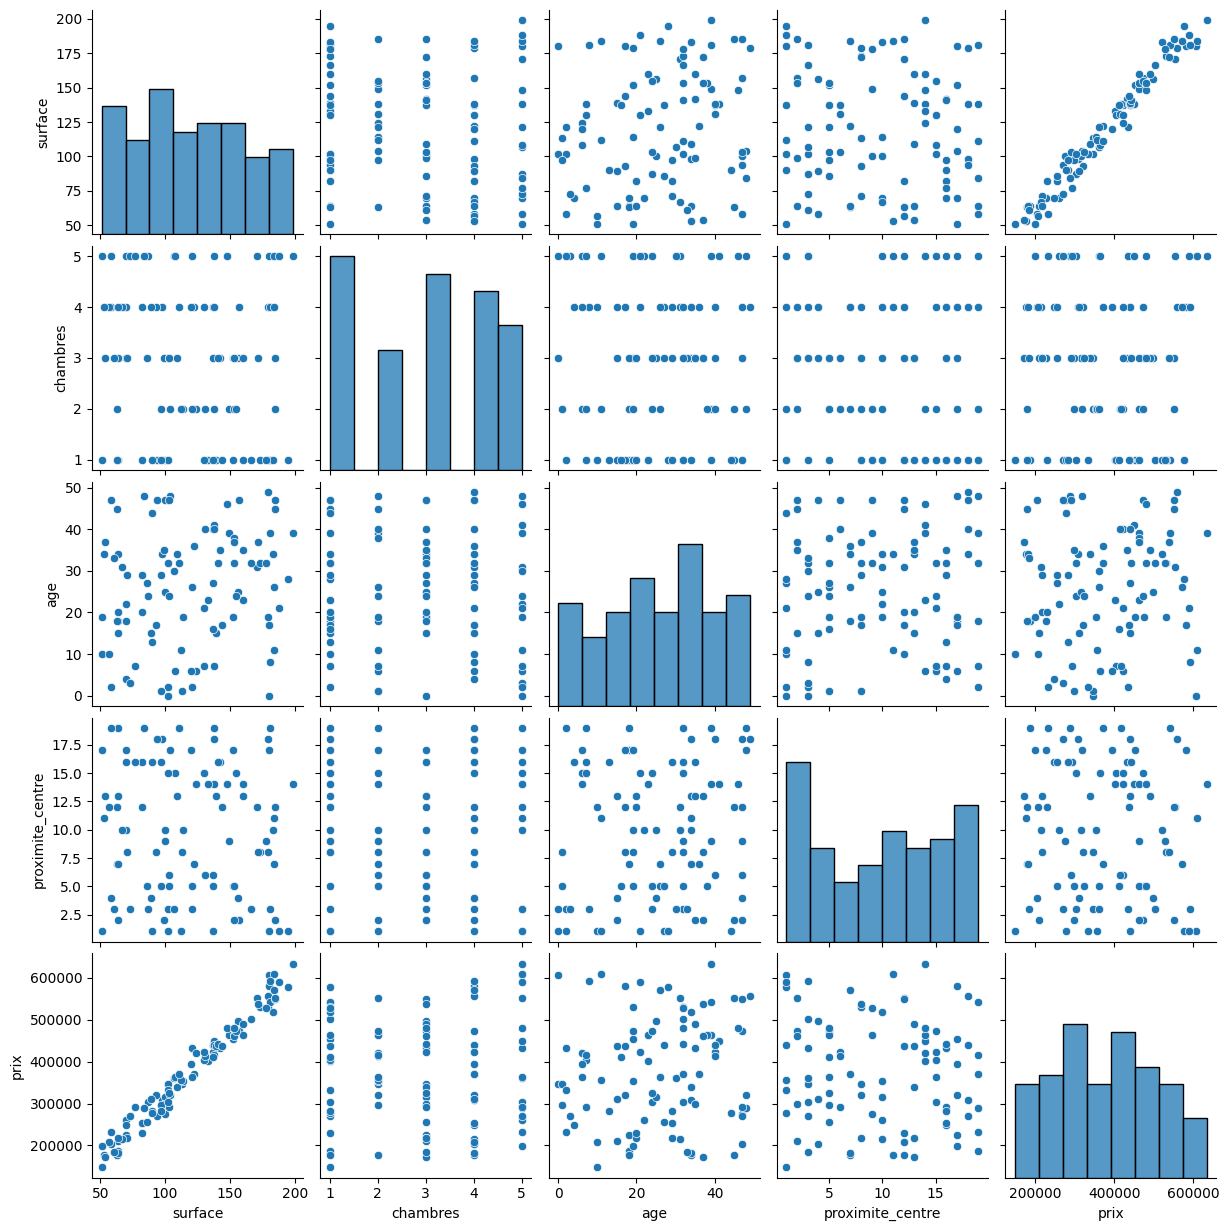

In [6]:
sns.pairplot(data)
plt.show()

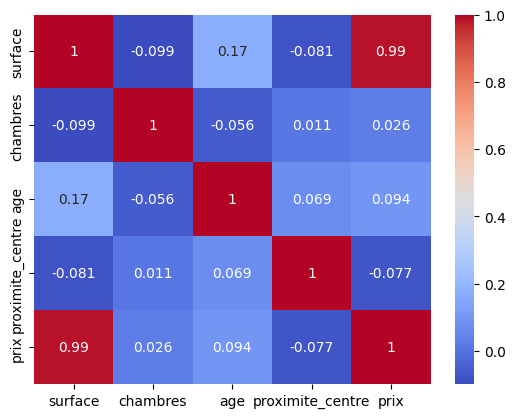

In [7]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

Sur les deux dernieres cellules on essaie d'explorer le jeu de données en visualisant les variables par pair. Sur le premier graphique on peut noter une forte corrélation entre la surface et le prix, confirmé par la heatmap indiquant les coéfficients de corrélation.

In [8]:
print(data.corr())

                   surface  chambres       age  proximite_centre      prix
surface           1.000000 -0.099231  0.168487         -0.080913  0.986007
chambres         -0.099231  1.000000 -0.056406          0.011496  0.025693
age               0.168487 -0.056406  1.000000          0.068508  0.094233
proximite_centre -0.080913  0.011496  0.068508          1.000000 -0.077054
prix              0.986007  0.025693  0.094233         -0.077054  1.000000


# Préparation des données

In [16]:
X = data[['surface', 'chambres', 'age', 'proximite_centre']]
y  = data['prix']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

Pour préparer les données on va créer un jeu de donnée d'entraînement et de test(avec 70% des données qui vont servirent à l'entraînement et 30% aux tests). On sélectionne les variable explicative (X) et la variable a expliquer (y).

# Modèle simple de régression linéaire

In [17]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)

print("MSE :", mean_squared_error(y_test, y_pred))
print("R² :", r2_score(y_test, y_pred))
print("Coefficients :", lr_model.coef_)
print("Intercept :", lr_model.intercept_)

MSE : 117484302.28801894
R² : 0.9938009764100244
Coefficients : [ 3038.15212001 10552.39012879  -376.41079822  -166.95235129]
Intercept : -9258.725975765905


Pour utiliser le model il faut d'abord l'instancier. On lui donne ensuite les valeurs du jeu de données d'entraînement. Puis on utilise le modèle entraîné pour prédire les valeur à partir du jeu de données test. Ensuite on compare les résultats obtenue (y_pred) aux vrai résultats (y_test).

Le MSE nous donne l'erreur quadratique moyenne entre les vraies valeurs et les prédictions. Plus elle est faible mieux le modèle ajuste les données en moyenne.

Le r2 nous donne la proportion de variance de y expliquée par le modèle, plus il est proche de 1 mieux c'est.

La ligne coefficents nous donne les coefficents (pente) associés à chaque variable indépendante dans le même ordre que X.

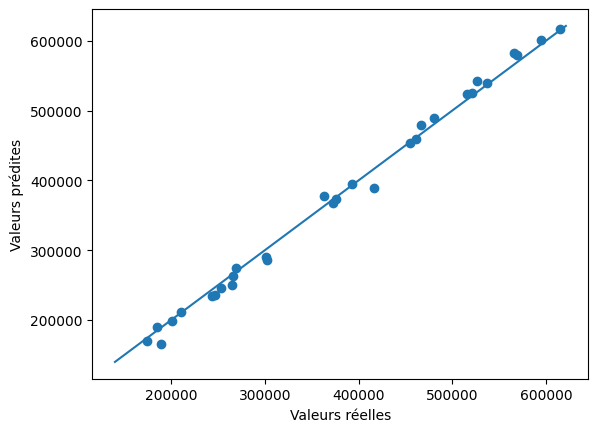

In [18]:
plt.scatter(y_test, y_pred)
plt.xlabel("Valeurs réelles")
plt.ylabel("Valeurs prédites")
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.show()